<a href="https://colab.research.google.com/github/b-mi/colab/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
%matplotlib  inline
import numpy as np
import torch
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

In [ ]:
transforms = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

In [ ]:
trainset = torchvision.datasets.CIFAR10(root="./datasets", download=True, train=True, transform=transforms)
testset = torchvision.datasets.CIFAR10(root="./datasets", download=True, train=False, transform=transforms)


Extracting ./datasets/cifar-10-python.tar.gz to ./datasets
Files already downloaded and verified


In [ ]:
class_names = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [17]:
def show_images(images, labels, rows=6, cols=10):
    fig, axes = plt.subplots(rows, cols, figsize=(cols, rows))
    plt.subplots_adjust(bottom=0)
    for idx in range(0, rows * cols):
        ridx = idx // cols
        cidx = idx % cols
        
        ax = axes[ridx, cidx]
        ax.axis("off")
        
        img = images[idx] / 2 + 0.5
        img = img.permute(1, 2, 0)

        ax.imshow(img.numpy())
        label = class_names[labels[idx]]

        ax.set_title("{}".format(label))
    plt.show()
    return fig

In [12]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [13]:
trainiter = iter(trainloader)
images, labels = trainiter.next()

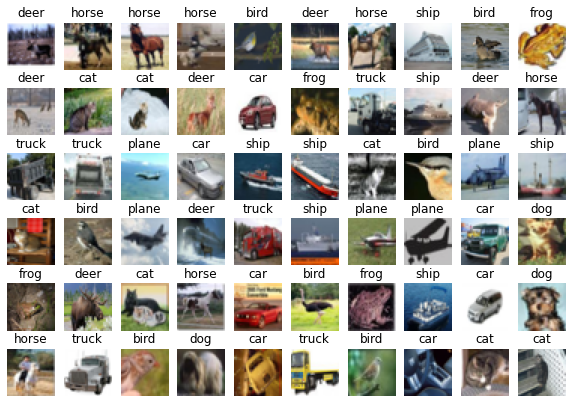

In [19]:
fig = show_images(images, labels)